## Task-D: Collinear features and their effect on linear models

In [89]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
data = pd.read_csv('task_d.csv')

In [91]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [92]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


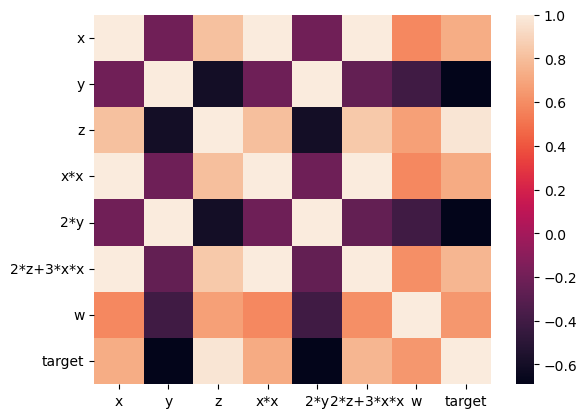

In [93]:

sns.heatmap(data.corr())
data.corr()

In [94]:
param_grid = {'C':sorted(np.logspace(-18,-20,50))}
cv = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,cv=5,scoring='accuracy')
cv.fit(X,Y)
cv.best_score_

1.0

In [95]:
lr = LogisticRegression(C=cv.best_params_['C'])
lr.fit(X,Y)
print("Accuracy : {}".format(lr.score(X,Y)))
lr.coef_

Accuracy : 1.0


array([[ 1.72326062e-17, -1.63427876e-17,  2.29516488e-17,
         1.70262710e-17, -1.63427876e-17,  1.80948039e-17,
         1.51849243e-17]])

In [96]:
# adding Noise to the original data
data1 = data.copy(deep=True)
data1['x'] = data1['x'] + np.random.normal(loc=5,scale=2,size=len(data1['x']))*(10**-2)
X = data1.drop(['target'], axis=1).values
Y = data1['target'].values

lr = LogisticRegression(C=cv.best_params_['C'])
lr.fit(X,Y)
print("Accuracy : {}".format(lr.score(X,Y)))
lr.coef_

Accuracy : 1.0


array([[ 1.72326062e-17, -1.63427876e-17,  2.29516488e-17,
         1.70262710e-17, -1.63427876e-17,  1.80948039e-17,
         1.51849243e-17]])

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

In [97]:
param_grid = {'alpha':sorted(np.logspace(-100,-200,50))}
cv = GridSearchCV(estimator=SGDClassifier(loss='hinge'),param_grid=param_grid,cv=5,scoring='accuracy')
cv.fit(X,Y)
cv.best_score_

1.0

In [98]:
svm = SGDClassifier(alpha=cv.best_params_['alpha'])
svm.fit(X,Y)
print("Accuracy : {}".format(svm.score(X,Y)))
Weight = svm.coef_
Weight
print(np.argsort(Weight))
print("Good features : ",list(data.columns[np.argsort(Weight)[0]]))

Accuracy : 1.0
[[1 4 3 5 2 0 6]]
Good features :  ['y', '2*y', 'x*x', '2*z+3*x*x', 'z', 'x', 'w']


In [99]:
# adding Noise to the original data
data1 = data.copy(deep=True)
data1['x'] = data1['x'] + np.random.normal(loc=5,scale=2,size=len(data1['x']))*(10**-2)
# data1['x*x'] = data1['x']*data1['x']
# data1['2*z+3*x*x'] = 2*data1['z'] + 3*data1['x*x']

X = data1.drop(['target'], axis=1).values
Y = data1['target'].values
svm = SGDClassifier(alpha=cv.best_params_['alpha'])
svm.fit(X,Y)
print("Accuracy : {}".format(svm.score(X,Y)))
print(svm.coef_)

#print(np.argsort(svm.coef_))

print("\nDifference in Weights :")
print(np.abs(Weight - svm.coef_))
print("\n Top 4 features where differnce is more :")
print(data1.columns[np.argsort(np.abs(Weight - svm.coef_))])

Accuracy : 1.0
[[ 3.21930621e+49 -4.53918274e+49  4.71159818e+49  3.10704912e+49
  -4.53918274e+49  3.36521444e+49  2.01744170e+49]]

Difference in Weights :
[[2.47594312e+49 1.29690936e+47 1.67047572e+48 1.29754853e+49
  1.29690936e+47 1.18797370e+49 4.03172473e+49]]

 Top 4 features where differnce is more :
[['y' '2*y' 'z' '2*z+3*x*x' 'x*x' 'x' 'w']]
